1. Problem Statement


Classification of Drug based on Age, Gender, Blood pressure, Cholesterol and Na_to_K.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

2. Data Collection

In [2]:
data = pd.read_csv(r"C:\Users\91738\Downloads\drug200.csv")

3. Basic EDA

In [3]:
df = data.copy()

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
#checking sjhape of data
df.shape

(200, 6)

In [6]:
#checking info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
#checking null values about columns
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
#checking duplicates
df.duplicated().sum()

0

In [9]:
#checking values which are present in Drug column
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [10]:
# checking unique values present in BP column
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [12]:
#checking unique values in cholesterol
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [13]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [14]:
#checking uniques values in sex
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [15]:
# changing data types of columns
df = df.astype(dtype = {'BP': 'category','Cholesterol':'category'})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    object  
 2   BP           200 non-null    category
 3   Cholesterol  200 non-null    category
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    object  
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 7.0+ KB


In [17]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

4. Data Pre-Processing

In [19]:
# grouping coumns into feature variable and class variable
feature_var = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

In [20]:
feature_var.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [21]:
class_var = df['Drug']

In [22]:
class_var.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# spliting data into train and test
x_train, x_test, y_train, y_test = train_test_split(feature_var, class_var, test_size= 0.20, random_state= 1, stratify= class_var)

In [26]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
41,58,F,HIGH,NORMAL,14.239
129,32,F,NORMAL,HIGH,7.477
65,68,F,NORMAL,NORMAL,27.050
39,15,M,NORMAL,HIGH,9.084
64,60,F,HIGH,HIGH,13.303


In [27]:
eda_df = pd.concat([x_train,y_train], axis= 1)

In [28]:
eda_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
41,58,F,HIGH,NORMAL,14.239,drugB
129,32,F,NORMAL,HIGH,7.477,drugX
65,68,F,NORMAL,NORMAL,27.050,DrugY
39,15,M,NORMAL,HIGH,9.084,drugX
64,60,F,HIGH,HIGH,13.303,drugB


5. EDA

In [30]:
high_bp_df = eda_df[eda_df['BP'] == 'HIGH']

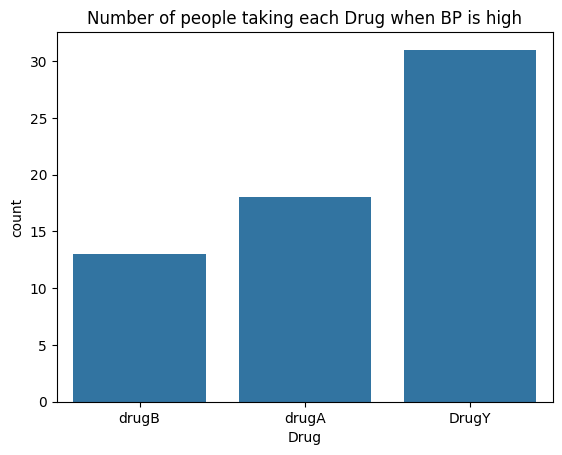

In [31]:
sns.countplot(data = high_bp_df,x = high_bp_df['Drug'])
plt.title('Number of people taking each Drug when BP is high')
plt.show()

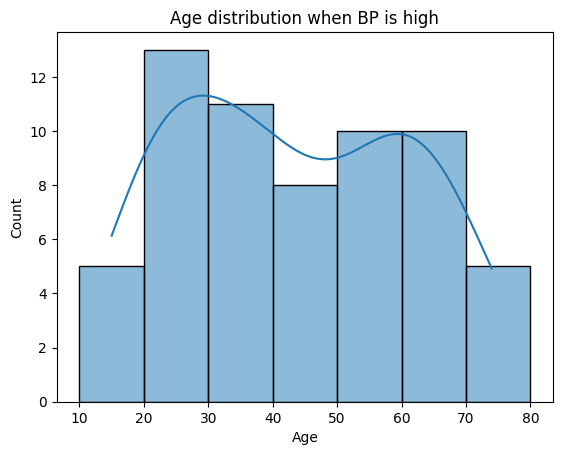

In [32]:
sns.histplot(high_bp_df['Age'], bins= [10,20,30,40,50,60,70,80], kde= True)
plt.title('Age distribution when BP is high')
plt.show()

In [33]:
high_cholesterol_df = eda_df[eda_df['Cholesterol'] == 'HIGH']

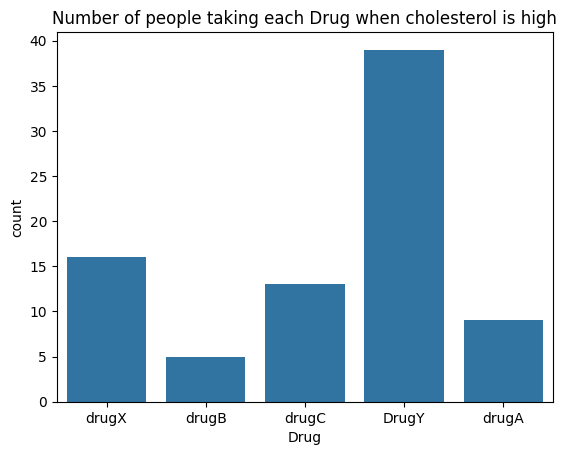

In [34]:
sns.countplot(data = high_cholesterol_df, x = high_cholesterol_df['Drug'])
plt.title('Number of people taking each Drug when cholesterol is high')
plt.show()

In [35]:
drug_age_avg = pd.DataFrame(eda_df.groupby(['Drug'])['Age'].mean())

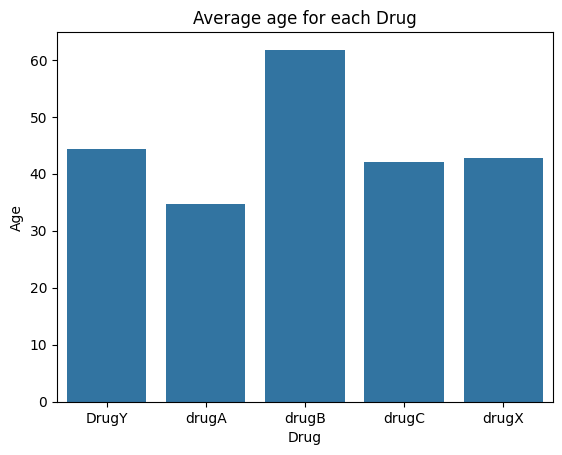

In [36]:
sns.barplot(data = drug_age_avg, x = drug_age_avg.index, y = drug_age_avg['Age'])
plt.title('Average age for each Drug')
plt.show()

In [38]:
import scipy.stats as ss

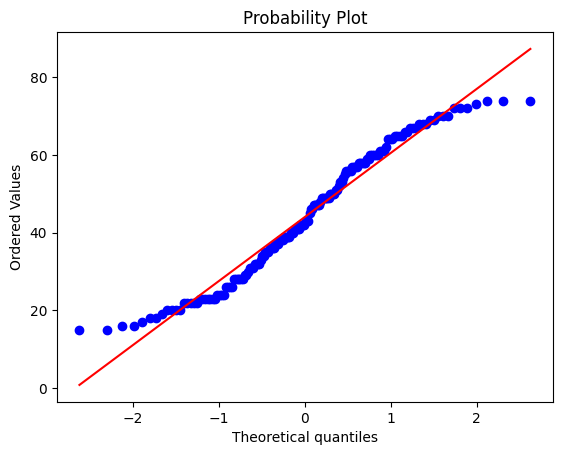

In [39]:
ss.probplot(x_train['Age'], dist= 'norm', plot= plt)
plt.show()

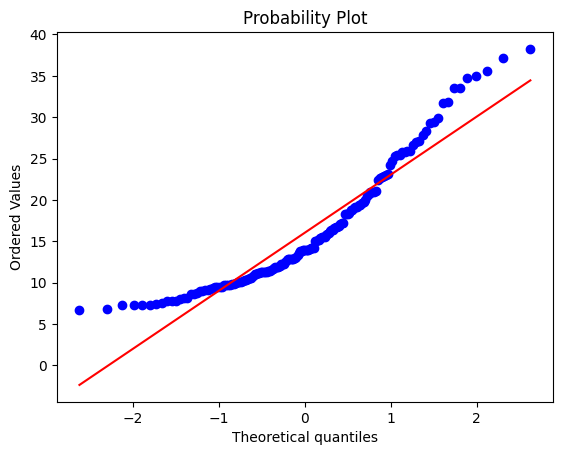

In [40]:
ss.probplot(x_train['Na_to_K'], dist= 'norm', plot= plt)
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,FunctionTransformer,LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from mixed_naive_bayes import MixedNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
import pickle
from sklearn.impute import SimpleImputer

In [42]:
pip install mixed_naive_bayes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\91738\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
def reci(x):
    return 1/x

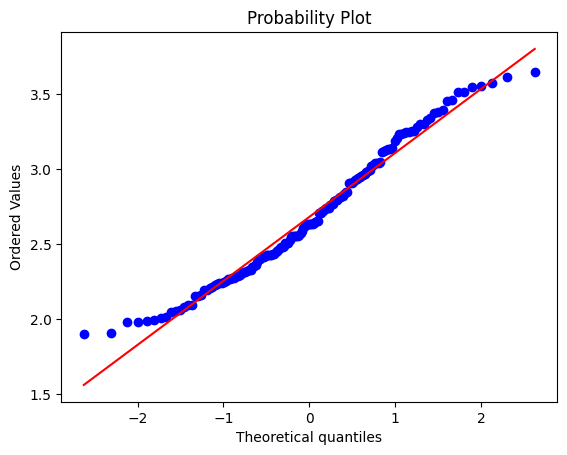

In [45]:
fuc_tran = FunctionTransformer(func = np.log)
ss.probplot(fuc_tran.fit_transform(x_train['Na_to_K']), dist= 'norm', plot= plt)
plt.show()

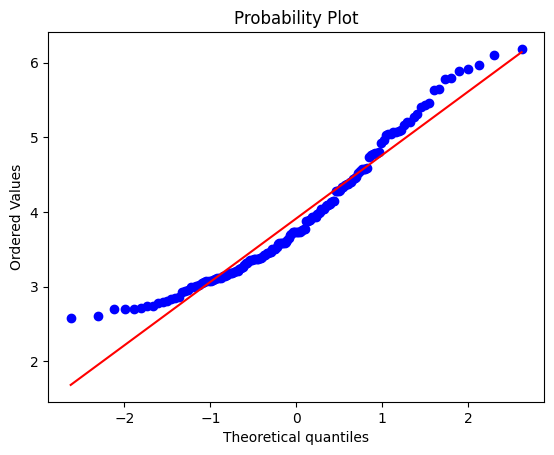

In [46]:
fuc_tran = FunctionTransformer(func = np.sqrt)
ss.probplot(fuc_tran.fit_transform(x_train['Na_to_K']), dist= 'norm', plot= plt)
plt.show()

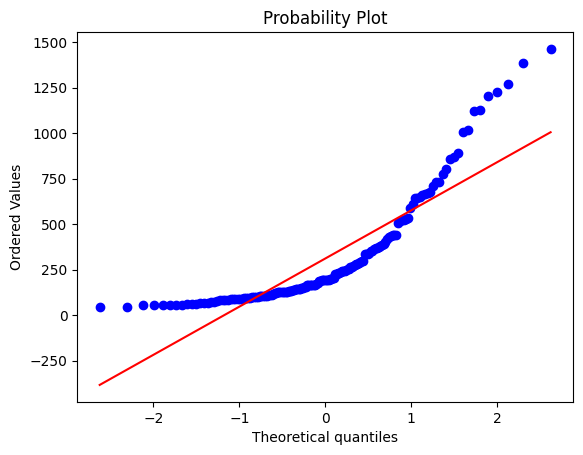

In [47]:
fuc_tran = FunctionTransformer(func = np.square)
ss.probplot(fuc_tran.fit_transform(x_train['Na_to_K']), dist= 'norm', plot= plt)
plt.show()

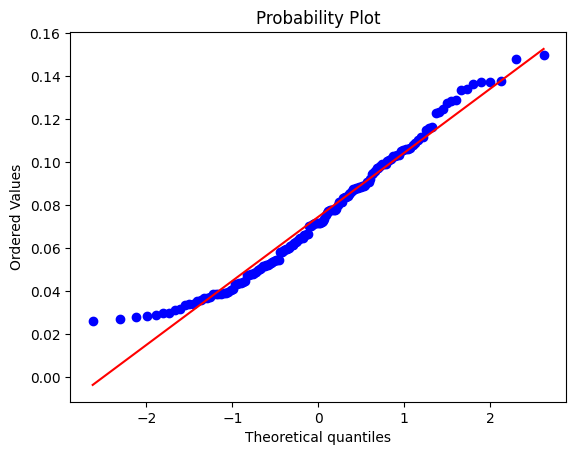

In [48]:
fuc_tran = FunctionTransformer(func = reci)
ss.probplot(fuc_tran.fit_transform(x_train['Na_to_K']), dist= 'norm', plot= plt)
plt.show()

In [49]:
pow_tran = PowerTransformer()

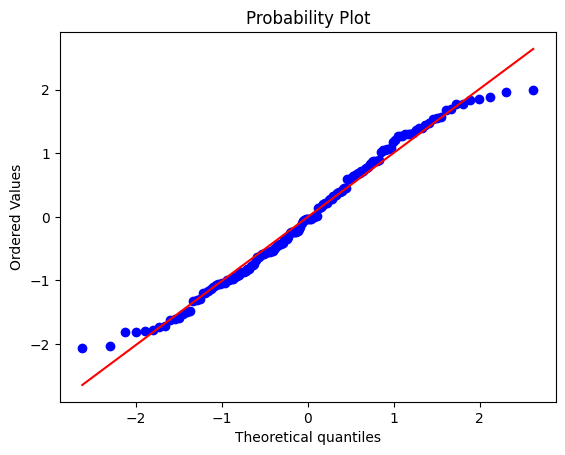

In [50]:
ss.probplot(pow_tran.fit_transform(x_train['Na_to_K'].values.reshape(-1,1)).ravel(), dist= 'norm', plot= plt)
plt.show()

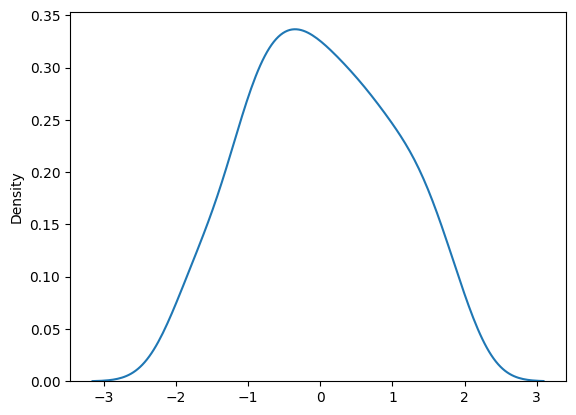

In [51]:
sns.kdeplot(pow_tran.fit_transform(x_train['Na_to_K'].values.reshape(-1,1)).ravel())
plt.show()

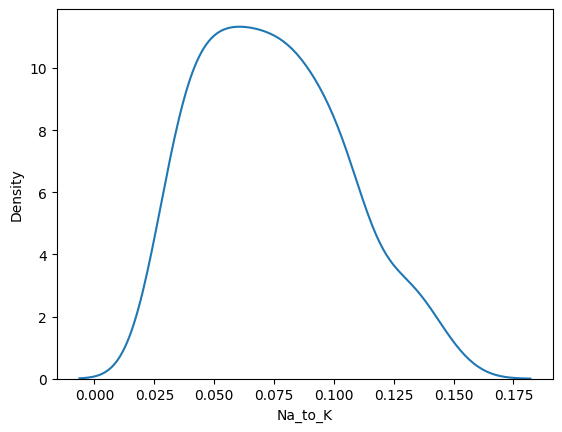

In [52]:
sns.kdeplot(fuc_tran.fit_transform(x_train['Na_to_K']))
plt.show()

In [53]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
41,58,F,HIGH,NORMAL,14.239
129,32,F,NORMAL,HIGH,7.477
65,68,F,NORMAL,NORMAL,27.050
39,15,M,NORMAL,HIGH,9.084
64,60,F,HIGH,HIGH,13.303


6. Fearure Extraction

In [54]:
class_var_encoding = LabelEncoder()

In [55]:
y_train = class_var_encoding.fit_transform(y_train)

In [56]:
y_train = pd.Series(y_train)

In [57]:
y_test = class_var_encoding.transform(y_test)

In [58]:
y_test = pd.Series(y_test)

In [59]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 41 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          160 non-null    int64   
 1   Sex          160 non-null    object  
 2   BP           160 non-null    category
 3   Cholesterol  160 non-null    category
 4   Na_to_K      160 non-null    float64 
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [64]:
# split entire x_train into numerical,nominal and ordinal dat
numerical_data = x_train.select_dtypes(include= ['int64','float64'])
nominal_data = x_train.select_dtypes(include= ['object'])
ordinal_data = x_train.select_dtypes(include= ['category'])

In [65]:
# creating pipeline and impleting imputing
numerical_pipe = Pipeline([('Null_values_imputation_1', SimpleImputer(strategy='mean')),
                           ('StandardScalar', StandardScaler()),
                           ('Power_Transform',PowerTransformer())])

In [66]:
nominal_pipe = Pipeline([('Null_values_imputation_2', SimpleImputer(strategy='most_frequent')),
                         ('OH_Encoding', OneHotEncoder(sparse_output= False,drop= 'first'))])

In [67]:
ordinal_pipe = Pipeline([('Null_values_imputation_2', SimpleImputer(strategy='most_frequent')),
                         ('Ordinal_Encoding', OrdinalEncoder(categories= [['NORMAL','LOW','HIGH'],['NORMAL','HIGH']]))])

In [68]:
prepro_col_trans = ColumnTransformer(transformers= [('Ordinal_Pre-Processing', ordinal_pipe, ordinal_data.columns),
                                                    ('Nominal_Pre-Processing', nominal_pipe, nominal_data.columns),
                                                    ('numerical_Pre-Processing', numerical_pipe, numerical_data.columns)],
                                     remainder="passthrough")

In [69]:
# feature extraction pipeline
feature_extraction_pipe = Pipeline([('Pre-Processing',prepro_col_trans)])

In [70]:
final_x_train = feature_extraction_pipe.fit_transform(x_train)

In [71]:
final_x_test = feature_extraction_pipe.transform(x_test)

In [72]:
feature_extraction_pipe.get_feature_names_out()

array(['Ordinal_Pre-Processing__BP',
       'Ordinal_Pre-Processing__Cholesterol',
       'Nominal_Pre-Processing__Sex_M', 'numerical_Pre-Processing__Age',
       'numerical_Pre-Processing__Na_to_K'], dtype=object)

7. Training

In [73]:
mixed_nb = MixedNB(categorical_features= [0,1,2])
model = mixed_nb.fit(final_x_train, y_train)

In [74]:
print(classification_report(y_test, model.predict(final_x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40

